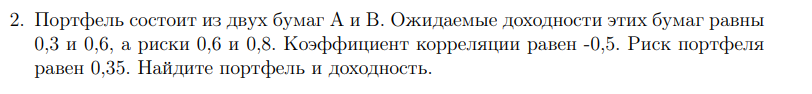

In [1]:
from scipy.optimize import fsolve
import numpy as np

# Параметры задачи
sigma_A = 0.6
sigma_B = 0.8
rho_AB = -0.5
sigma_p = 0.35

# Функция для оптимизации
def equations(weights):
    w_A, w_B = weights
    # Расчет риска портфеля
    portfolio_risk = np.sqrt((w_A * sigma_A)**2 + (w_B * sigma_B)**2 + 2 * w_A * w_B * sigma_A * sigma_B * rho_AB)
    # Условие суммы долей
    sum_weights = w_A + w_B - 1
    return (portfolio_risk - sigma_p, sum_weights)

# Начальные значения для весов (доли)
initial_guess = [0.5, 0.5]

# Решение системы уравнений
solution = fsolve(equations, initial_guess)
w_A, w_B = solution

# Расчет ожидаемой доходности портфеля
expected_return_A = 0.3
expected_return_B = 0.6
portfolio_return = w_A * expected_return_A + w_B * expected_return_B

print(f"Доля актива A в портфеле: {w_A:.4f}")
print(f"Доля актива B в портфеле: {w_B:.4f}")
print(f"Ожидаемая доходность портфеля: {portfolio_return:.4f}")


Доля актива A в портфеле: 0.5323
Доля актива B в портфеле: 0.4677
Ожидаемая доходность портфеля: 0.4403


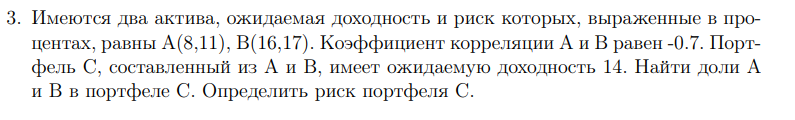

In [2]:
from scipy.optimize import fsolve
import numpy as np

# Заданные параметры
E_RA = 0.08
E_RB = 0.16
sigma_A = 0.11
sigma_B = 0.17
rho_AB = -0.7
E_Rp = 0.14

# Функция для расчета доли актива A
def find_w_A(w_A):
    w_B = 1 - w_A
    return E_Rp - (w_A * E_RA + w_B * E_RB)

# Используем fsolve для нахождения корня функции, доли актива A
w_A = fsolve(find_w_A, 0.5)[0]
w_B = 1 - w_A

# Расчет риска портфеля
sigma_p = np.sqrt((w_A * sigma_A)**2 + (w_B * sigma_B)**2 + 2 * w_A * w_B * sigma_A * sigma_B * rho_AB)

print(f"Доля актива A в портфеле C: {w_A:.4f}")
print(f"Доля актива B в портфеле C: {w_B:.4f}")
print(f"Риск портфеля C: {sigma_p:.4f}")


Доля актива A в портфеле C: 0.2500
Доля актива B в портфеле C: 0.7500
Риск портфеля C: 0.1100


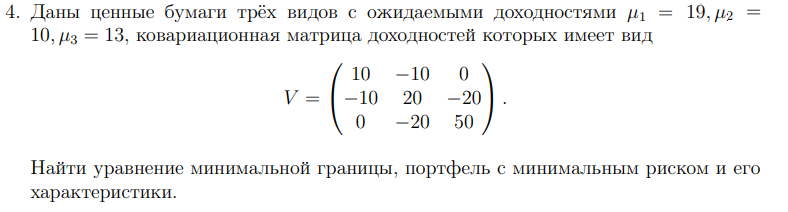

In [3]:
import numpy as np
from scipy.optimize import minimize

# Ковариационная матрица
V = np.array([
    [10, -10, 0],
    [-10, 20, -20],
    [0, -20, 50]
])

# Ожидаемые доходности
mu = np.array([19, 10, 13])

# Функция для минимизации
def portfolio_variance(weights, covariance_matrix):
    return weights.T @ covariance_matrix @ weights

# Ограничения
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # Сумма весов должна быть равна 1

# Начальные предположения о весах
initial_weights = np.array([1/3, 1/3, 1/3])

# Границы для весов
bounds = ((0, 1), (0, 1), (0, 1))

# Оптимизация
min_var_portfolio = minimize(
    portfolio_variance,
    initial_weights,
    args=(V,),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

# Результаты
if min_var_portfolio.success:
    weights_min_var = min_var_portfolio.x
    min_var = min_var_portfolio.fun
    expected_return_min_var = weights_min_var @ mu

    print(f"Веса для портфеля с минимальным риском: {weights_min_var}")
    print(f"Минимальная дисперсия: {min_var}")
    print(f"Ожидаемая доходность портфеля с минимальным риском: {expected_return_min_var}")
else:
    print("Оптимизация не удалась.")


Веса для портфеля с минимальным риском: [0.43333334 0.4        0.16666666]
Минимальная дисперсия: 0.33333333333334225
Ожидаемая доходность портфеля с минимальным риском: 14.400000030884694


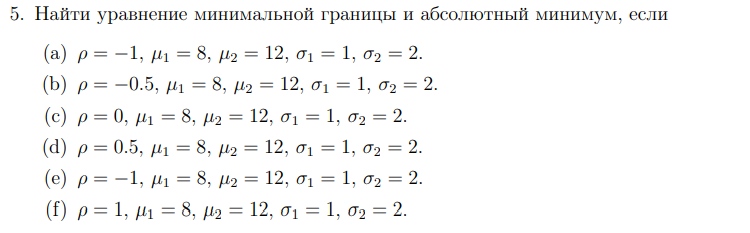

In [4]:
import numpy as np

# Заданные параметры для каждого случая
cases = {
    'a': {'rho': -1, 'mu1': 8, 'mu2': 12, 'sigma1': 1, 'sigma2': 2},
    'b': {'rho': -0.5, 'mu1': 8, 'mu2': 12, 'sigma1': 1, 'sigma2': 2},
    'c': {'rho': 0, 'mu1': 8, 'mu2': 12, 'sigma1': 1, 'sigma2': 2},
    'd': {'rho': 0.5, 'mu1': 8, 'mu2': 12, 'sigma1': 1, 'sigma2': 2},
    'e': {'rho': -1, 'mu1': 8, 'mu2': 12, 'sigma1': 1, 'sigma2': 2},
    'f': {'rho': 1, 'mu1': 8, 'mu2': 12, 'sigma1': 1, 'sigma2': 2},
}

# Функция для расчета весов и риска портфеля
def calculate_portfolio(case):
    rho = cases[case]['rho']
    mu1 = cases[case]['mu1'] / 100
    mu2 = cases[case]['mu2'] / 100
    sigma1 = cases[case]['sigma1'] / 100
    sigma2 = cases[case]['sigma2'] / 100

    # Если активы полностью отрицательно коррелированы, можно создать безрисковый портфель
    if rho == -1:
        w1 = sigma2 / (sigma1 + sigma2)
        w2 = 1 - w1
        sigma_p = 0  # Безрисковый портфель
    # Если активы полностью положительно коррелированы, инвестируем в актив с наименьшим риском
    elif rho == 1:
        w1 = 0 if sigma1 > sigma2 else 1
        w2 = 1 - w1
        sigma_p = min(sigma1, sigma2)
    else:
        # Для всех остальных случаев используем формулу для двух активов
        # Минимизируем дисперсию портфеля
        w1 = (sigma2**2 - rho * sigma1 * sigma2) / (sigma1**2 + sigma2**2 - 2 * rho * sigma1 * sigma2)
        w2 = 1 - w1
        sigma_p = np.sqrt(w1**2 * sigma1**2 + w2**2 * sigma2**2 + 2 * w1 * w2 * sigma1 * sigma2 * rho)
    
    # Возвращаем результаты
    return w1, w2, sigma_p * 100  # Преобразуем обратно в проценты

# Расчет для каждого случая
for case in cases:
    w1, w2, sigma_p = calculate_portfolio(case)
    print(f"Case {case}: w1 = {w1:.4f}, w2 = {w2:.4f}, sigma_p = {sigma_p:.2f}%")


Case a: w1 = 0.6667, w2 = 0.3333, sigma_p = 0.00%
Case b: w1 = 0.7143, w2 = 0.2857, sigma_p = 0.65%
Case c: w1 = 0.8000, w2 = 0.2000, sigma_p = 0.89%
Case d: w1 = 1.0000, w2 = 0.0000, sigma_p = 1.00%
Case e: w1 = 0.6667, w2 = 0.3333, sigma_p = 0.00%
Case f: w1 = 1.0000, w2 = 0.0000, sigma_p = 1.00%


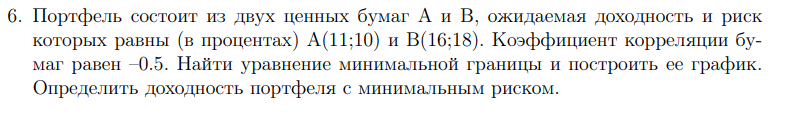